In [1]:
## This is the first ICA example
## Import the necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
from scipy import signal

Ok, We have this equation x=As, what it is saying is that we have some independent source signals s, they're linearly combined with the matrix A to give us the signal we see, x.

Now, we name inverse of the A matrix as W, and s=xW. Starting now, we want to create some independent signals that will be mixed by the matrix A. The independent sources signals are (1) a sine wave, (2) a saw tooth signal and (3) a random noise vector. After calculating their dot product with A we get three linear combinations of these source signals.

In [2]:
np.random.seed(23)
ns=np.linspace(0,200,1000)
print("ns shape is",ns.shape)
## Creating the source matrix
first=np.sin(ns*1)  
second=signal.sawtooth(ns*1.9)
third=np.random.random(len(ns))
S=np.array([first,second,third])
print("S shape is",S[0].shape)
print(S.shape)
## Creating the mixing matrix
A=np.array([[0.5,1,0.2],[1,0.5,0.4],[0.5,0.8,1]])
## Now mixing the signals witht= the mixing matrix
X=np.dot(A,S)

X.shape

ns shape is (1000,)
S shape is (1000,)
(3, 1000)


(3, 1000)

Now we have a matrix which contains three different rows containing three different signals. Let's plot them to see

Text(0.5, 1.0, 'Independent sources')

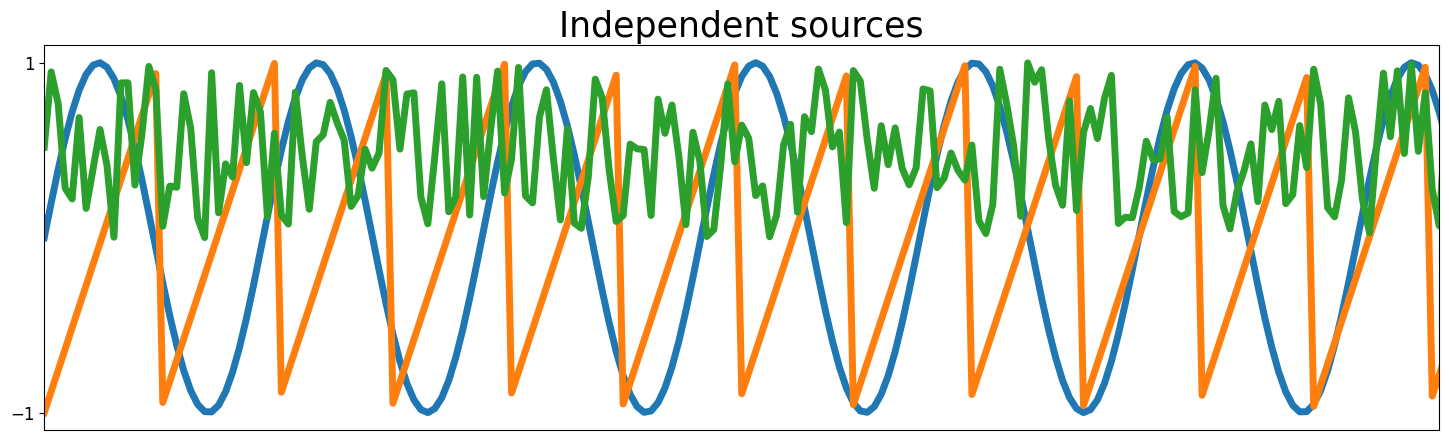

In [3]:
## Plot the first row of the source matrix X
fig, ax=plt.subplots(1,1,figsize=(18,5))
ax.plot(ns, S[0], lw=5)
ax.plot(ns, S[1], lw=5)
ax.plot(ns, S[2], lw=5)
ax.set_xticks([])
ax.set_yticks([-1, 1])
ax.set_xlim(ns[0], ns[200])
ax.tick_params(labelsize=12)
ax.set_title('Independent sources', fontsize=25)

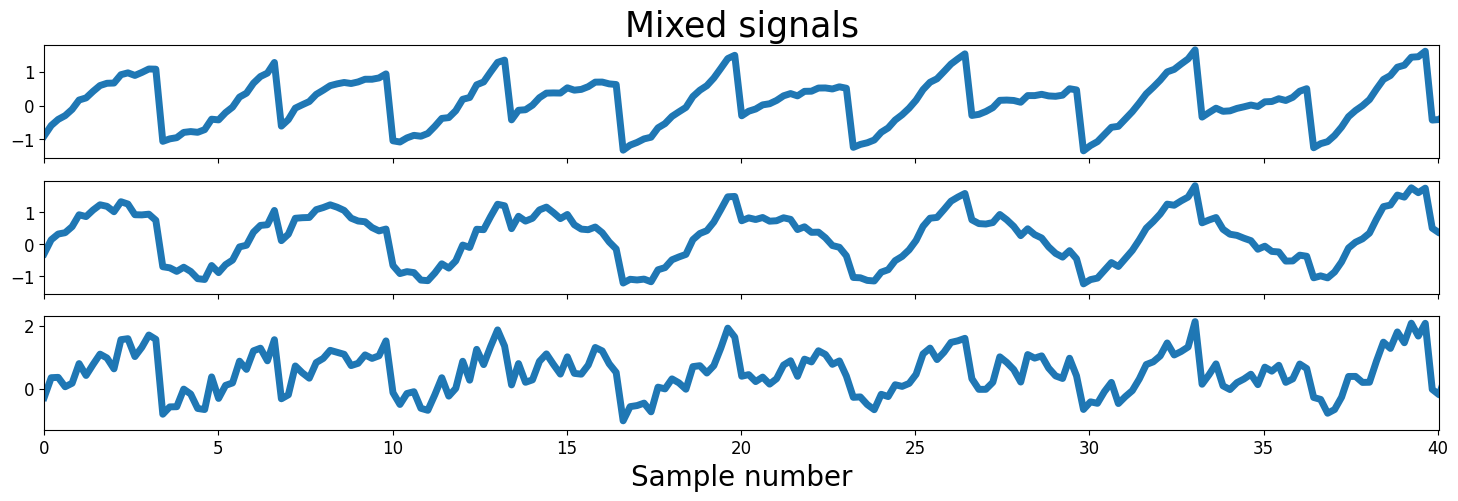

In [4]:
fig, ax = plt.subplots(3, 1, figsize=[18, 5], sharex=True)
ax[0].plot(ns, X[0], lw=5)
ax[0].set_title('Mixed signals', fontsize=25)
ax[0].tick_params(labelsize=12)

ax[1].plot(ns, X[1], lw=5)
ax[1].tick_params(labelsize=12)
ax[1].set_xlim(ns[0], ns[-1])

ax[2].plot(ns, X[2], lw=5)
ax[2].tick_params(labelsize=12)
ax[2].set_xlim(ns[0], ns[-1])
ax[2].set_xlabel('Sample number', fontsize=20)
ax[2].set_xlim(ns[0], ns[200])

plt.show()

In [5]:
## Defining the necessary functions for ICA
def g(x):
    return np.tanh(x)

def gprime(x):
    return 1 - np.tanh(x)**2

def center(X):
    return X - X.mean(axis=1, keepdims=True)

def covariance(X):
    m ,n=X.shape
    covariance_matrix=np.zeros((m,m))
    for i in range(m):
        X[i] = X[i] - X[i].mean()
        covariance_matrix[i,i]=np.var(X[i])

    for i in range(m):
        for j in range(i+1,m):
            covariance_matrix[i,j]=np.dot(X[i],X[j])/n
            covariance_matrix[j,i]=covariance_matrix[i,j]
    return covariance_matrix
        

def whitening(x):
    cov = covariance(x)
    d, E = np.linalg.eigh(cov)
    D = np.diag(d)
    D_inv = np.sqrt(np.linalg.inv(D))
    X_whiten = np.dot(E, np.dot(D_inv, np.dot(E.T, x)))
    return X_whiten

def calculate_new_w(w, X):
    w_new = (X * g(np.dot(w.T, X))).mean(axis=1) - gprime(np.dot(w.T, X)).mean() * w
    w_new /= np.sqrt((w_new ** 2).sum())
    return w_new

In [63]:
## w is a 3x3 random matrix
w = np.random.rand(3, 3)
wnew=calculate_new_w(w, X)
wnew
W=np.zeros((3,3),dtype=X.dtype)
#wnew-=np.dot(np.dot(wnew,W[:1].T),W[:1])
print(w)
w[:1]

[[0.17474649 0.00201899 0.81546522]
 [0.37237529 0.00794114 0.57976579]
 [0.38887338 0.41002097 0.60489874]]


array([[0.17474649, 0.00201899, 0.81546522]])

array([[2, 2],
       [6, 6]])

In [66]:
def ica (x, iterations):
    tolerance=1e-5
    x=whitening(x)
    number_of_components=x.shape[0]
    W=np.zeros((number_of_components,number_of_components),dtype=X.dtype)
    print("W shape is",W.shape)
    for i in range(number_of_components):
        w=np.random.rand(number_of_components)
        for j in range(iterations):
            w_new=calculate_new_w(w,x)
            if i>=1:
                w_new-=np.dot(np.dot(w_new,W[:i].T),W[:i])
            distance=np.abs(np.abs((w*w_new).sum())-1)
            w=w_new
            if distance<tolerance:
                print("Converged after",j,"iterations for component",i)
                break
            if j%300==0:
                print("Now at iteration",j,"for component",i)
        W[i,:]=w
    S=np.dot(W,x)
    return S,W

In [68]:
[y,z]=ica(X,3000)



W shape is (3, 3)
Now at iteration 0 for component 0
Converged after 4 iterations for component 0
Now at iteration 0 for component 1
Now at iteration 300 for component 1
Now at iteration 600 for component 1
Now at iteration 900 for component 1
Now at iteration 1200 for component 1
Now at iteration 1500 for component 1
Now at iteration 1800 for component 1
Now at iteration 2100 for component 1
Now at iteration 2400 for component 1
Now at iteration 2700 for component 1
Now at iteration 0 for component 2
Now at iteration 300 for component 2
Now at iteration 600 for component 2
Now at iteration 900 for component 2
Now at iteration 1200 for component 2
Now at iteration 1500 for component 2
Now at iteration 1800 for component 2
Now at iteration 2100 for component 2
Now at iteration 2400 for component 2
Now at iteration 2700 for component 2


Text(0.5, 1.0, 'Independent sources')

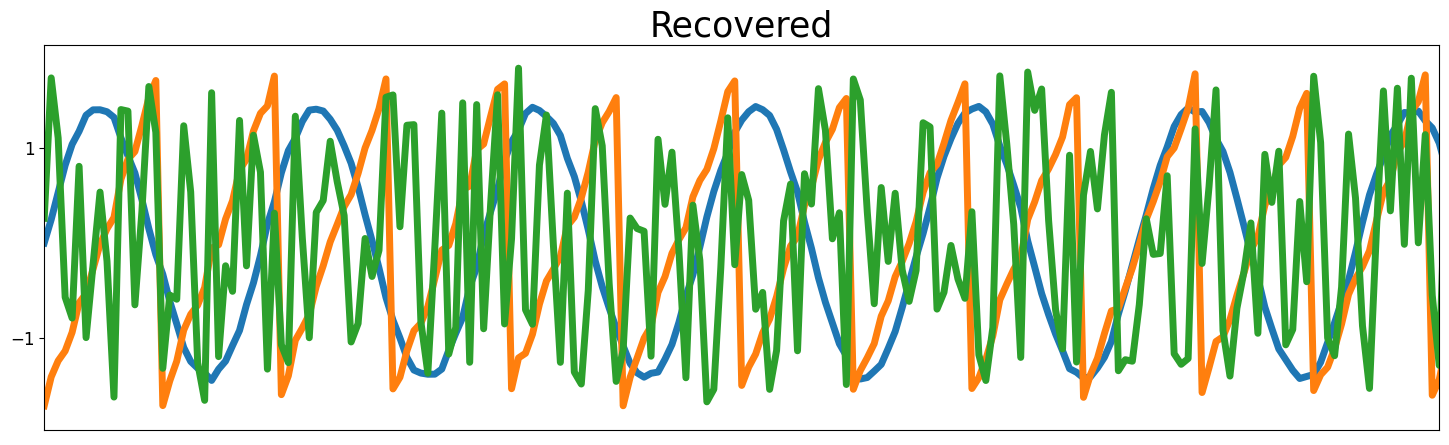

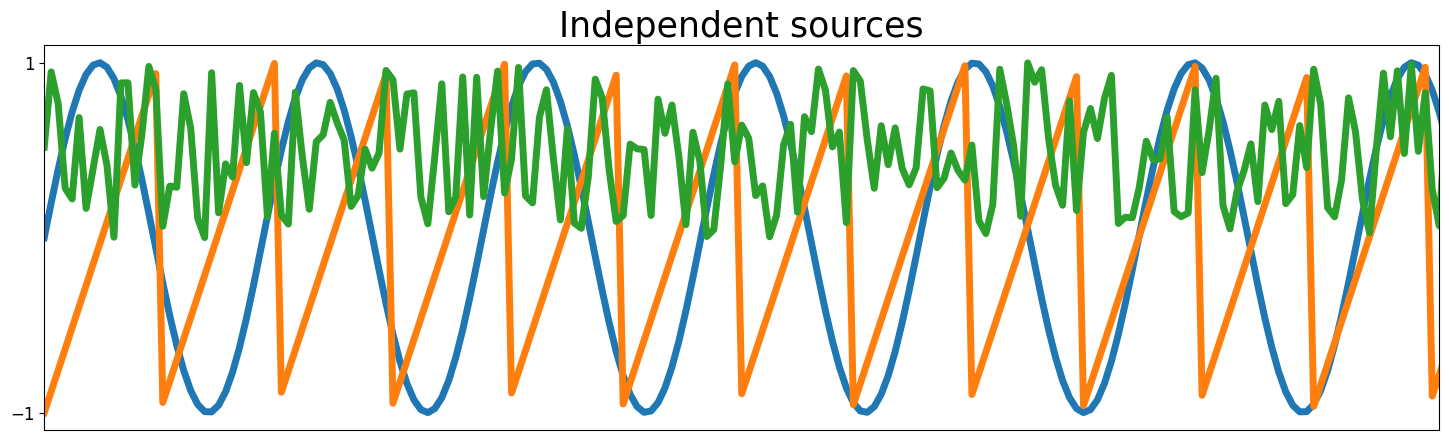

In [69]:

## plot the first row of y
fig, ax=plt.subplots(1,1,figsize=(18,5))
ax.plot(ns, y[0], lw=5)
ax.plot(ns, y[1], lw=5)
ax.plot(ns, y[2], lw=5)
ax.set_xticks([])

ax.set_yticks([-1, 1])
ax.set_xlim(ns[0], ns[200])
ax.tick_params(labelsize=12)
ax.set_title('Recovered', fontsize=25)
## in a new plot, plot the independent sources
fig, ax=plt.subplots(1,1,figsize=(18,5))
ax.plot(ns, S[0], lw=5)
ax.plot(ns, S[1], lw=5)
ax.plot(ns, S[2], lw=5)
ax.set_xticks([])
ax.set_yticks([-1, 1])
ax.set_xlim(ns[0], ns[200])
ax.tick_params(labelsize=12)
ax.set_title('Independent sources', fontsize=25) 

